In [5]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
filename = os.getcwd()+'/test1.h5'

with h5py.File(filename, "r") as f:
    psi = np.array(f['psi'])
# print(psi.shape)
print(psi)
print(psi.shape)

[[[[-4.72367430e+00 -3.51509213e-01]
   [ 7.43432808e+00 -2.39163566e+00]
   [ 7.94526768e+00  1.01320505e+01]
   ...
   [-1.43067722e+01  1.56833849e+01]
   [ 9.93462849e+00  8.19077969e+00]
   [ 2.26152134e+00  7.47493696e+00]]

  [[-1.64640057e+00  7.63403702e+00]
   [-3.76722312e+00  8.83717251e+00]
   [-5.59070301e+00  1.33668222e+01]
   ...
   [-9.11643791e+00 -2.11409988e+01]
   [ 8.04227829e+00  1.20519562e+01]
   [-7.23224688e+00  6.32314777e+00]]

  [[ 1.27759256e+01  1.60045040e+00]
   [ 1.26143599e+01  7.12781954e+00]
   [ 4.07633352e+00  1.90521774e+01]
   ...
   [ 2.70300484e+01 -9.75139046e+00]
   [ 7.44998217e+00 -1.80027695e+01]
   [ 1.43689365e+01 -1.86052561e+00]]

  ...

  [[ 1.72481842e+01 -1.23754768e+01]
   [-2.07346172e+01  1.00063448e+01]
   [ 2.28763809e+01 -1.73892021e+01]
   ...
   [-9.62243271e+00  2.94700985e+01]
   [ 1.27729216e+01  2.57403488e+01]
   [ 1.41054230e+01 -1.81958332e+01]]

  [[-2.97102332e+00  1.25283175e+01]
   [-6.47454917e-01  1.44744148e

In [7]:
nx = 128
nxhalf = int(nx/2.)
kx = [i for i in range(nxhalf)]
kx.extend([-nxhalf+i for i in range(nxhalf)])
kx = np.array(kx)
k = np.sqrt(np.add.outer(kx**2,kx**2))
print(k)
# plt.contourf(kx,kx,psi[0,:,:,0])
# plt.colorbar()

[[0.         1.         2.         ... 3.         2.         1.        ]
 [1.         1.41421356 2.23606798 ... 3.16227766 2.23606798 1.41421356]
 [2.         2.23606798 2.82842712 ... 3.60555128 2.82842712 2.23606798]
 ...
 [3.         3.16227766 3.60555128 ... 4.24264069 3.60555128 3.16227766]
 [2.         2.23606798 2.82842712 ... 3.60555128 2.82842712 2.23606798]
 [1.         1.41421356 2.23606798 ... 3.16227766 2.23606798 1.41421356]]


In [8]:
def normHs(psi,kx,ky,s):

    Nt,Nx,Ny,_ = psi.shape

    norm = np.zeros(Nt)

    for k in range(Nt):
        nnorm = 0
        for i in range(Nx):
            for j in range(Ny):
                nnorm += np.sqrt(kx[i]**2+ky[j]**2+1)**(2*s)*np.linalg.norm(psi[k,i,j,:],2)**2
        norm[k] = np.sqrt(nnorm)

    return norm
        

[6773.73319411 6773.73434257 6773.73380776 6773.72849894 6773.72978172
 6773.72592107 6773.73408644 6773.72380865 6773.72597445 6773.72310534
 6773.72744378 6773.72721356 6773.72123527 6773.72979117 6773.73546106
 6773.73411112 6773.73535726 6773.74171431 6773.74367113 6773.74065181
 6773.7453661  6773.74477734 6773.74610573 6773.73642425 6773.74000212
 6773.73870203 6773.74252906 6773.73866017 6773.73926951 6773.73392702
 6773.73907037 6773.7441823  6773.73297083 6773.72835862 6773.7250603
 6773.72472581 6773.71722843 6773.71076579 6773.71477171 6773.7214196
 6773.72170195 6773.72439534 6773.72942019 6773.72678211 6773.73024212
 6773.72722731 6773.72919    6773.72295909 6773.73369436 6773.7289303
 6773.73031934 6773.7307943  6773.73697029 6773.73491882 6773.73636806
 6773.73670877 6773.73735396 6773.73870226 6773.74154773 6773.74611922
 6773.738064   6773.73561882 6773.73908805 6773.74022263 6773.74059623
 6773.74178589 6773.74131537 6773.73599741 6773.73735966 6773.73348499
 6773.741

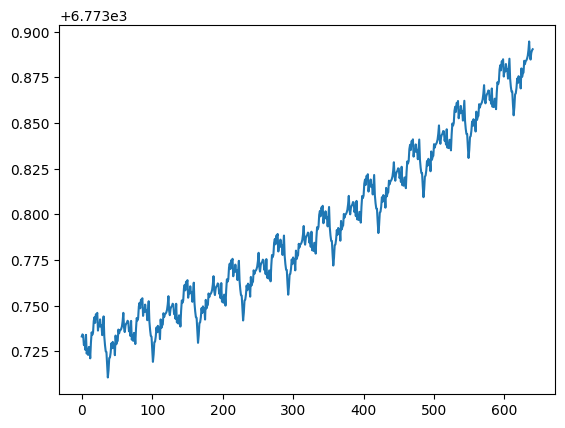

In [9]:
psiH2 = normHs(psi,kx,kx,2)
print(psiH2)
plt.plot(psiH2)